First, libraries are installed.

In [1]:
pip install pytket

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pytket_qiskit

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit

Note: you may need to restart the kernel to use updated packages.


In [1]:
# Importing standard Qiskit libraries
from qiskit import *
import pytket
from pytket.extensions.qiskit import (
    AerStateBackend,
    AerBackend,
    AerUnitaryBackend,
    IBMQBackend,
    IBMQEmulatorBackend,
)

In [2]:
# Loading your IBM Quantum account(s)
IBMQ.save_account('NEW_API_TOKEN', overwrite=True)# <-- load your own token if neccessary
IBMQ.load_account()
provider = IBMQ.get_provider()

List out the avaliable IBM backend and corresponding gate:

In [3]:
import warnings #used to disable warnings in this jupyter notebook, can be omitted 
warnings.filterwarnings('ignore') #used to disable warnings in this jupyter notebook, can be omitted

ibmbackends_simulator = provider.backends(simulator=True)  # ibmq.
ibmbackends_machine = provider.backends(simulator=False)  # ibmq.

print ('IBM_Machines:')
for i in range(len(ibmbackends_machine)):
    IBM_backend = IBMQEmulatorBackend(str(ibmbackends_machine[i]))
    print (i+1, ":", ibmbackends_machine[i], "\n", IBM_backend.backend_info.gate_set)

IBM_Machines:
1 : ibmq_lima 
 {<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.Reset: 60>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.SX: 28>}
2 : ibmq_belem 
 {<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.SX: 28>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.Reset: 60>}
3 : ibmq_quito 
 {<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.SX: 28>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.Reset: 60>}
4 : ibmq_manila 
 {<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.Reset: 60>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.SX: 28>}
5 : ibm_nairobi 
 {<OpType.Rz: 33>, <OpType.U3: 34>, <OpType.U2: 35>, <OpType.U1: 36>, <OpType.CX: 39>, <OpType.SX: 28>, <OpType.X: 20>, <OpType.noop: 57>, <OpType.Measure: 58>, <OpType.Reset: 60>}


The information is tablulated as follows:

| Item | Provider | Machine Name | Qubits | Gate |
| :-: | :-: | :-: | :-: | :-: |
| 1 | IBM | ibmq_lima | 5 | Rz, U3, U2, U1, CX, SX, X, noop, Measure, Reset |
| 2 | IBM | ibmq_belem | 5 | Rz, U3, U2, U1, CX, SX, X, noop, Measure, Reset |
| 3 | IBM | ibmq_quito | 5 | Rz, U3, U2, U1, CX, SX, X, noop, Measure, Reset |
| 4 | IBM | ibmq_manila | 5 | Rz, U3, U2, U1, CX, SX, X, noop, Measure, Reset |
| 5 | IBM | ibm_nairobi | 7 | Rz, U3, U2, U1, CX, SX, X, noop, Measure, Reset |
| 6 | IBM | ibm_oslo | 7 |Rz, U3, U2, U1, CX, SX, X, noop, Measure, Reset |

Next,

In [4]:
from pytket.extensions.qiskit import IBMQBackend
backend = IBMQBackend("ibmq_lima")
# List out the average error of each node
print(backend.backend_info.averaged_node_gate_errors)

{node[0]: 0.0002733880143365393, node[1]: 0.00047588046311080603, node[2]: 0.0002893674234395419, node[3]: 0.00015388651992769622, node[4]: 0.00041594470324597}


In [5]:
from pytket.circuit import Node
# List out the gate error in each node
for i in range(5):
    print("for node", i)
    print(backend.backend_info.all_node_gate_errors[Node(i)], "\n")

for node 0
{<OpType.noop: 57>: 0.00045564669056089876, <OpType.Rz: 33>: 0.0, <OpType.SX: 28>: 0.00045564669056089876, <OpType.X: 20>: 0.00045564669056089876, <OpType.Reset: 60>: 0.0} 

for node 1
{<OpType.noop: 57>: 0.0007931341051846768, <OpType.Rz: 33>: 0.0, <OpType.SX: 28>: 0.0007931341051846768, <OpType.X: 20>: 0.0007931341051846768, <OpType.Reset: 60>: 0.0} 

for node 2
{<OpType.noop: 57>: 0.0004822790390659032, <OpType.Rz: 33>: 0.0, <OpType.SX: 28>: 0.0004822790390659032, <OpType.X: 20>: 0.0004822790390659032, <OpType.Reset: 60>: 0.0} 

for node 3
{<OpType.noop: 57>: 0.00025647753321282705, <OpType.Rz: 33>: 0.0, <OpType.SX: 28>: 0.00025647753321282705, <OpType.X: 20>: 0.00025647753321282705, <OpType.Reset: 60>: 0.0} 

for node 4
{<OpType.noop: 57>: 0.0006932411720766167, <OpType.Rz: 33>: 0.0, <OpType.SX: 28>: 0.0006932411720766167, <OpType.X: 20>: 0.0006932411720766167, <OpType.Reset: 60>: 0.0} 



In [6]:
print(backend.backend_info.all_edge_gate_errors)

{(node[4], node[3]): {<OpType.CX: 39>: 0.0354965918386127}, (node[3], node[4]): {<OpType.CX: 39>: 0.01774829591930635}, (node[0], node[1]): {<OpType.CX: 39>: 0.020162539177979166}, (node[1], node[0]): {<OpType.CX: 39>: 0.010081269588989583}, (node[3], node[1]): {<OpType.CX: 39>: 0.03636552440219343}, (node[1], node[3]): {<OpType.CX: 39>: 0.018182762201096714}, (node[2], node[1]): {<OpType.CX: 39>: 0.0170944809465034}, (node[1], node[2]): {<OpType.CX: 39>: 0.0085472404732517}}


In [15]:
pip install qiskit[nature]

     |████████████████████████████████| 2.0 MB 179 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install pyscf

  Using cached pyscf-2.0.1-cp38-cp38-macosx_10_13_x86_64.whl (23.6 MB)
Note: you may need to restart the kernel to use updated packages.


In [145]:
from qiskit import *
from qiskit_nature.drivers import UnitsType, Molecule
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit_nature.drivers.second_quantization import ElectronicStructureDriverType, ElectronicStructureMoleculeDriver, PySCFDriver
from qiskit_nature.operators.second_quantization import FermionicOp
from qiskit_nature.mappers.second_quantization import JordanWignerMapper, ParityMapper, BravyiKitaevMapper
from qiskit_nature.problems.second_quantization import ElectronicStructureProblem
from qiskit_nature.converters.second_quantization import QubitConverter
from qiskit_nature.transformers.second_quantization.electronic import ActiveSpaceTransformer


from qiskit.algorithms import VQE
from qiskit import Aer
from qiskit.utils import QuantumInstance
from qiskit_nature.algorithms.ground_state_solvers import GroundStateEigensolver
from qiskit.algorithms.optimizers import SLSQP, COBYLA, SPSA

from qiskit_nature.circuit.library.initial_states import HartreeFock
from qiskit_nature.circuit.library.ansatzes import UCCSD, PUCCD, SUCCD



Calculate the exact ground energy of H2 system

In [94]:
def HHsimulation (distance, mappingmethod, ansatz, optimizer):
    molecule_geometry=[["H", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, distance]]]
    #define the molecule
    molecule = Molecule(geometry=molecule_geometry, multiplicity=1,  charge=0, units=UnitsType.ANGSTROM
    )
    #define the electronic structure #using Slater-type orbital(STO)-3G PySCFDriver
    driver = ElectronicStructureMoleculeDriver(
        molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
    ) 
    
    
    # construct the problem
    es_problem = ElectronicStructureProblem(driver)
    # change the system in 2nd quantized form
    second_q_ops = es_problem.second_q_ops()
    # the truncation value of the FermionicOp
    FermionicOp.set_truncation(500)
    # define the hamiltonian
    hamiltonian = second_q_ops[0]

    # choose the mapping method
    mapper = mappingmethod()
    # Define the mapped qubits
    qubit_converter = QubitConverter(mapper, two_qubit_reduction=True)
    qubit_op = qubit_converter.convert(hamiltonian, num_particles=es_problem.num_particles)
    #print(qubit_op_parity)
    
    # count the numbers
    particle_number = es_problem.grouped_property_transformed.get_property("ParticleNumber")
    num_spin_orbitals = particle_number.num_spin_orbitals
    num_particles = particle_number.num_particles
    
    # Set the initiate state
    init_state = HartreeFock(num_spin_orbitals, num_particles, qubit_converter)

    # Set the ansatz
    ansatz = ansatz(qubit_converter,num_particles,num_spin_orbitals)
    
    #ansatz.initial_state = init_state
    
    return ansatz, optimizer, qubit_converter, es_problem, qubit_op#, repulsion_energy
    



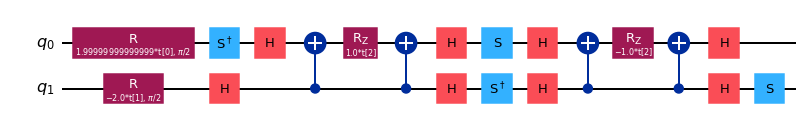

In [95]:
# energy at the optimzed point
ansatz, optimizer, qubit_converter, es_problem, qubit_op = HHsimulation (0.735, ParityMapper, UCCSD, SLSQP) 
# print the ansatz
ansatz.decompose().decompose().decompose().draw('mpl', style='iqx')

In [161]:
from qiskit.algorithms import NumPyMinimumEigensolver

npme = NumPyMinimumEigensolver()
calc = GroundStateEigensolver(qubit_converter, npme)
H2res = calc.solve(es_problem)
print(H2res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.857275030202
  - computed part:      -1.857275030202
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -1.137306035753
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.3889487]
    - computed part:      [0.0  0.0  1.3889487]
  > Dipole moment (a.u.): [0.0  0.0  0.0]  Total: 0.0
                 (debye): [0.0  0.0  0.0]  Total: 0.0
 


In [164]:
# print the bond energy vs distance
H2energy=[]
H2distance=np.arange(0.1, 2.5, 0.1)
for i in H2distance:
    ansatz, optimizer, qubit_converter, es_problem, qubit_op = HHsimulation (i, ParityMapper, UCCSD, SLSQP)
    calc = GroundStateEigensolver(qubit_converter, npme)
    res = calc.solve(es_problem)
    H2energy.append(res.total_energies)
    

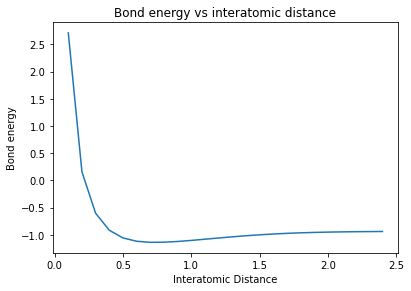

In [165]:
import matplotlib.pyplot as plt
import numpy as np

a= plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.plot(H2distance,H2energy)
plt.xlabel('Interatomic Distance')
plt.ylabel('Bond energy')
plt.title('Bond energy vs interatomic distance')

plt.show()

Calculate the exact ground energy of LiH

In [140]:
from qiskit_nature.transformers.second_quantization.electronic import FreezeCoreTransformer

def LiHsimulation (distance, mappingmethod, ansatz, optimizer):
    molecule_geometry=[["Li", [0.0, 0.0, 0.0]], ["H", [0.0, 0.0, distance]]]
    #define the molecule
    molecule = Molecule(geometry=molecule_geometry, multiplicity=1,  charge=0, units=UnitsType.ANGSTROM
    )
    #define the electronic structure #using Slater-type orbital(STO)-3G PySCFDriver
    driver = ElectronicStructureMoleculeDriver(
        molecule, basis="sto3g", driver_type=ElectronicStructureDriverType.PYSCF
    ) 
    
    # construct the problem
    es_problem = ElectronicStructureProblem(driver)
    # change the system in 2nd quantized form
    second_q_ops = es_problem.second_q_ops()
    # the truncation value of the FermionicOp
    FermionicOp.set_truncation(500)
    # define the hamiltonian
    hamiltonian = second_q_ops[0]

    # choose the mapping method
    mapper = mappingmethod()
    # Define the mapped qubits
    qubit_converter = QubitConverter(mapper, two_qubit_reduction=True, z2symmetry_reduction=[1,1])
    qubit_op_parity = qubit_converter.convert(hamiltonian, num_particles=es_problem.num_particles)
    #print(qubit_op_parity)
    
    # count the numbers
    particle_number = es_problem.grouped_property_transformed.get_property("ParticleNumber")
    num_spin_orbitals = particle_number.num_spin_orbitals
    num_particles = particle_number.num_particles
    
    # Set the initiate state
    init_state = HartreeFock(num_spin_orbitals, num_particles, qubit_converter)
    
    # Set the ansatz
    
    ansatz = ansatz(qubit_converter,num_particles,num_spin_orbitals)

    ansatz.initial_state = init_state
    
    return ansatz, optimizer, qubit_converter, es_problem, qubit_op
    

In [141]:
# ground state energy of LiH
ansatz, optimizer, qubit_converter, es_problem, qubit_op = LiHsimulation (1.5949, ParityMapper, UCCSD, SLSQP) 
# print the ansatz
#ansatz.decompose().decompose().decompose().draw('mpl', style='iqx')

In [143]:
from qiskit.algorithms import NumPyMinimumEigensolver

npme = NumPyMinimumEigensolver()
calc = GroundStateEigensolver(qubit_converter, npme)
res = calc.solve(es_problem)
print(res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -8.877783454702
  - computed part:      -8.877783454702
~ Nuclear repulsion energy (Hartree): 0.995380044366
> Total ground state energy (Hartree): -7.882403410335
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 4.000 S: 0.000 S^2: 0.000 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  3.0139242]
 


In [146]:
# print the bond energy vs distance
energy=[]
distance=np.arange(0.5, 3, 0.1)
for i in distance:
    ansatz, optimizer, qubit_converter, es_problem, qubit_op = LiHsimulation (i, ParityMapper, UCCSD, SLSQP)
    calc = GroundStateEigensolver(qubit_converter, npme)
    res = calc.solve(es_problem)
    energy.append(res.total_energies)
    

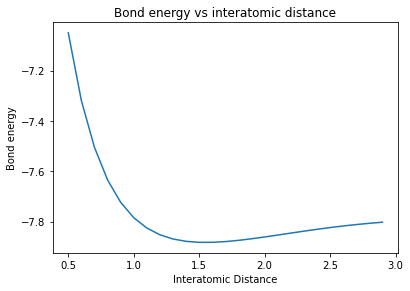

In [147]:
import matplotlib.pyplot as plt
import numpy as np

a= plt.figure()
axes= a.add_axes([0.1,0.1,0.8,0.8])
axes.plot(distance,energy)
plt.xlabel('Interatomic Distance')
plt.ylabel('Bond energy')
plt.title('Bond energy vs interatomic distance')

plt.show()

For noise model, 

In [176]:
from qiskit.test.mock import FakeProvider
provider = FakeProvider()
[ b.name() for b in provider.backends()]


<ipython-input-176-c0528a95085a>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeProvider


['fake_almaden',
 'fake_armonk',
 'fake_athens',
 'fake_belem',
 'fake_boeblingen',
 'fake_bogota',
 'fake_brooklyn',
 'fake_burlington',
 'fake_cairo',
 'fake_cambridge',
 'fake_cambridge',
 'fake_casablanca',
 'fake_essex',
 'fake_guadalupe',
 'fake_hanoi',
 'fake_jakarta',
 'fake_johannesburg',
 'fake_kolkata',
 'fake_lagos',
 'fake_lima',
 'fake_london',
 'fake_manila',
 'fake_manhattan',
 'fake_melbourne',
 'fake_montreal',
 'fake_mumbai',
 'fake_nairobi',
 'fake_openpulse_2q',
 'fake_openpulse_3q',
 'fake_ourense',
 'fake_paris',
 'fake_poughkeepsie',
 'fake_qasm_simulator',
 'fake_quito',
 'fake_rochester',
 'fake_rome',
 'fake_rueschlikon',
 'fake_santiago',
 'fake_singapore',
 'fake_sydney',
 'fake_tenerife',
 'fake_tokyo',
 'fake_toronto',
 'fake_valencia',
 'fake_vigo',
 'fake_washington',
 'fake_yorktown']

In [ ]:
For Lima emulator

In [158]:
from pytket.extensions.qiskit import IBMQEmulatorBackend
from qiskit import IBMQ
from qiskit_nature.algorithms import GroundStateEigensolver
from qiskit.test.mock import FakeLima
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.aer.noise import NoiseModel


def emusolver(distance, mappingmethod, ansatz, optimizer): 
    ansatz, optimizer, qubit_converter, es_problem, qubit_op = HHsimulation (distance, mappingmethod, ansatz, optimizer)  
    device_backend = FakeLima()
    backend = Aer.get_backend('aer_simulator')
    counts1 = []
    values1 = []
    noise_model = None
    device = QasmSimulator.from_backend(device_backend)
    coupling_map = device.configuration().coupling_map
    noise_model = NoiseModel.from_backend(device)
    basis_gates = noise_model.basis_gates

    quantum_instance = QuantumInstance(backend=Aer.get_backend("qasm_simulator"), noise_model = noise_model)


    real_solver = VQE( 
        ansatz=ansatz,
        optimizer=optimizer(),
        quantum_instance=quantum_instance
    )

    calc = GroundStateEigensolver(qubit_converter, real_solver)
    res = calc.solve(es_problem)
    
    
    return res

<ipython-input-158-46e16db00803>:4: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeLima


In [166]:
eH2res=emusolver(0.735, ParityMapper, UCCSD, SLSQP)
print(eH2res)

=== GROUND STATE ENERGY ===
 
* Electronic ground state energy (Hartree): -1.473998775609
  - computed part:      -1.473998775609
~ Nuclear repulsion energy (Hartree): 0.719968994449
> Total ground state energy (Hartree): -0.75402978116
 
=== MEASURED OBSERVABLES ===
 
  0:  # Particles: 2.000 S: 0.242 S^2: 0.301 M: 0.000
 
=== DIPOLE MOMENTS ===
 
~ Nuclear dipole moment (a.u.): [0.0  0.0  1.3889487]
 
  0: 
  * Electronic dipole moment (a.u.): [0.0  0.0  1.82205847]
    - computed part:      [0.0  0.0  1.82205847]
  > Dipole moment (a.u.): [0.0  0.0  -0.43310977]  Total: 0.43310977
                 (debye): [0.0  0.0  -1.10085512]  Total: 1.10085512
 


In [167]:
# print the bond energy vs distance
eH2energy=[]
eH2distance=np.arange(0.1, 2.5, 0.1)
for i in eH2distance:
    eH2res=emusolver(i, ParityMapper, UCCSD, SLSQP)
    eH2energy.append(eH2res.total_energies)
    

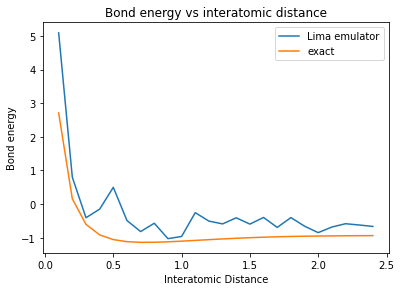

In [171]:
b= plt.figure()
axes= b.add_axes([0.1,0.1,0.8,0.8])
axes.plot(eH2distance,eH2energy, label='Lima emulator')
axes.plot(H2distance,H2energy, label='exact')
plt.xlabel('Interatomic Distance')
plt.ylabel('Bond energy')
plt.title('Bond energy vs interatomic distance')
plt.legend()
plt.show()

In [187]:
from qiskit.test.mock import FakeSydney

def emusolver1(distance, mappingmethod, ansatz, optimizer): 
    ansatz, optimizer, qubit_converter, es_problem, qubit_op = HHsimulation (distance, mappingmethod, ansatz, optimizer)  
    device_backend = FakeSydney()
    backend = Aer.get_backend('aer_simulator')
    counts1 = []
    values1 = []
    noise_model = None
    device = QasmSimulator.from_backend(device_backend)
    coupling_map = device.configuration().coupling_map
    noise_model = NoiseModel.from_backend(device)
    basis_gates = noise_model.basis_gates

    quantum_instance = QuantumInstance(backend=Aer.get_backend("qasm_simulator"), noise_model = noise_model)


    real_solver = VQE( 
        ansatz=ansatz,
        optimizer=optimizer(),
        quantum_instance=quantum_instance
    )

    calc = GroundStateEigensolver(qubit_converter, real_solver)
    res = calc.solve(es_problem)
    
    
    return res

<ipython-input-187-57b1f6066885>:1: DeprecationWarning: The module 'qiskit.test.mock' is deprecated since Qiskit Terra 0.21.0, and will be removed 3 months or more later. Instead, you should import the desired object directly 'qiskit.providers.fake_provider'.
  from qiskit.test.mock import FakeSydney


In [188]:
# print the bond energy vs distance
eH2energy1=[]
eH2distance1=np.arange(0.1, 2.5, 0.1)
for i in eH2distance1:
    eH2res1=emusolver1(i, ParityMapper, UCCSD, SLSQP)
    eH2energy1.append(eH2res1.total_energies)
    

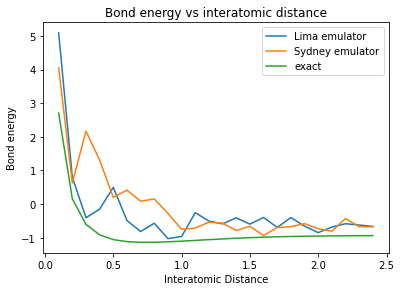

In [189]:
c= plt.figure()
axes= c.add_axes([0.1,0.1,0.8,0.8])
axes.plot(eH2distance,eH2energy, label='Lima emulator')
axes.plot(eH2distance1,eH2energy1, label='Sydney emulator')
axes.plot(H2distance,H2energy, label='exact')
plt.xlabel('Interatomic Distance')
plt.ylabel('Bond energy')
plt.title('Bond energy vs interatomic distance')
plt.legend()
plt.show()